In [2]:
import numpy as np

In [27]:
class LinearRegression:

    def __init__(self, lr = 0.001, n_iters=1000):
        self.lr = lr # 학습률
        self.n_iters = n_iters # 반복횟수
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape # 데이터 수, 특성 수 가져오기
        self.weights = np.zeros(n_features) # 특성 수 만큼 weights배열 만들기
        self.bias = 0

        for _ in range(self.n_iters):
            y_preds = np.dot(X, self.weights) + self.bias # np.dot() = 내적 구하기
    
            dw = (1/n_samples) * np.dot(X.T, (y_preds-y))
            db = (1/n_samples) * np.sum(y_preds-y)
    
            # weights, bias 업데이트
            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db

    def predict(self, X):
        y_preds = np.dot(X, self.weights) + self.bias
        return y_preds

In [57]:
def mse(y_test, predictions):
    return np.mean((y_test-predictions)**2)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

In [11]:
X, y = datasets.make_regression(
    n_samples=100,
    n_features=1,
    noise=20,
    random_state=10
)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=1234
)

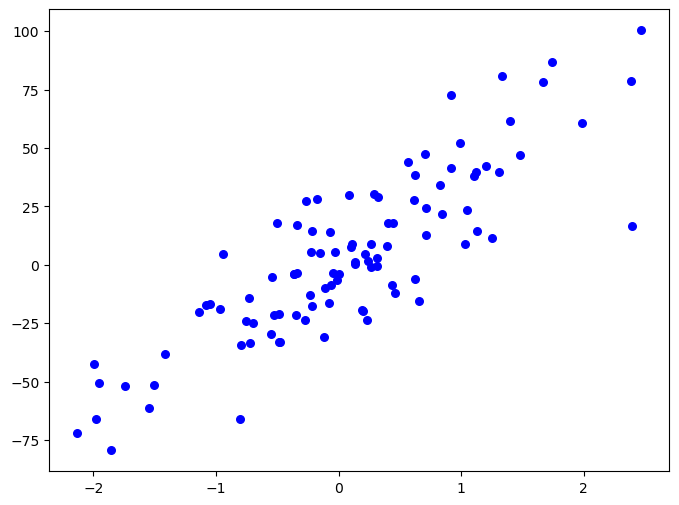

In [15]:
fig = plt.figure(figsize=(8,6))
plt.scatter(
    X[:, 0], y,
    color = 'b',
    marker='o',
    s=30
)
plt.show()

In [55]:
reg = LinearRegression(lr=0.01)
reg.fit(X_train, y_train)
predictions = reg.predict(X_test)

In [59]:
err = mse(y_test, predictions)
print(err)

311.9946331341979


In [61]:
y_pred_line = reg.predict(X)

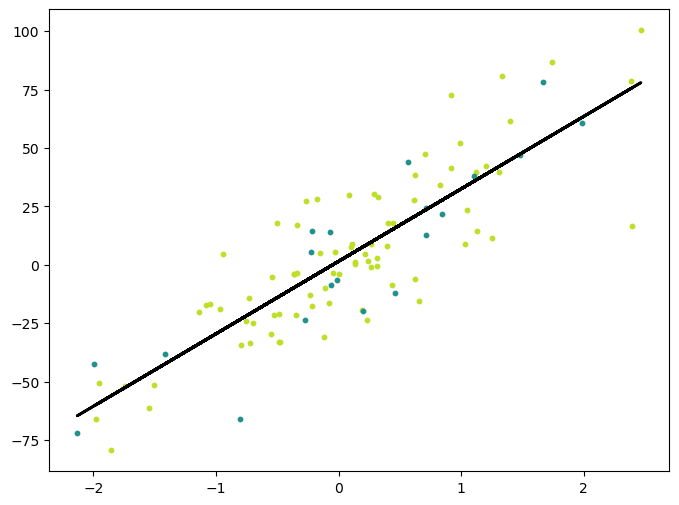

In [63]:
cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(8,6))
plt.scatter(
    X_train, y_train,
    color = cmap(0.9),
    s=10
)
plt.scatter(
    X_test, y_test,
    color = cmap(0.5),
    s=10
)
plt.plot(X, y_pred_line, color='black', linewidth=2)
plt.show()